In [2]:
# imports
import pandas as pd
from old.src import (
    compare_missing_data,
    plot_missing
)

## Prepare data for comparison
Specifically, OBS4MIPS data require a different latitudinal "binning" in order to be comparable with CIMP7 data.
OBS4MIPs data are gridded in $5 \times 5$ boxes.

![grid_obs4mips_vs_cimp7.png](../tutorials/grid_obs4mips_vs_cimp7.png)


In [3]:
# load preprocessed data (here example CH4)
d_cimp_ch4 = pd.read_csv("../data/CMIP7_CH4.csv")
d_obs_ch4 = pd.read_csv("../data/OBS4MIPS_CH4_prep.csv")

In [4]:
# check grid merging for obs4mips data
d_obs_ch4[["lat", "lat_bnds"]].drop_duplicates()

,lat,lat_bnds
0,-82.5,-90.0
220,-77.5,-75.0
540,-72.5,-75.0
870,-67.5,-75.0
910,-62.5,-60.0
1040,-57.5,-60.0
1240,-52.5,-60.0
1510,-47.5,-45.0
1860,-42.5,-45.0
2360,-37.5,-45.0


## Methane data

In [5]:
d_counts = compare_missing_data(
    d_cimp=d_cimp_ch4,
    d_obs=d_obs_ch4,
    gas="ch4",
    min_year_cimp=2000
)

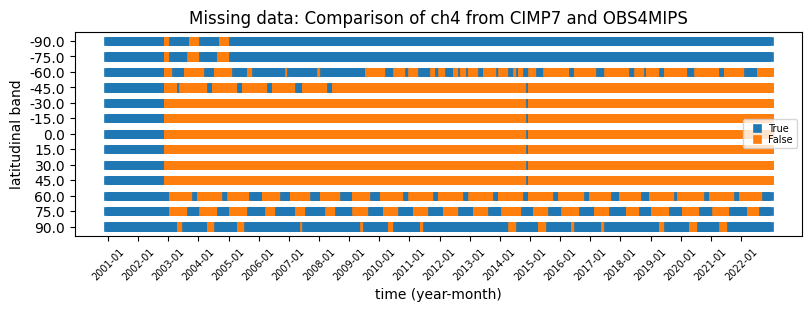

In [6]:
plot_missing(d_counts, "ch4", figsize=(8,3))

## CO2 data

In [7]:
# load data
d_cimp_co2 = pd.read_csv("../data/CMIP7_CO2.csv")
d_obs_co2 = pd.read_csv("../data/OBS4MIPS_CO2_prep.csv")

In [8]:
d_counts = compare_missing_data(
    d_cimp=d_cimp_co2,
    d_obs=d_obs_co2,
    gas="co2",
    min_year_cimp=2000
)

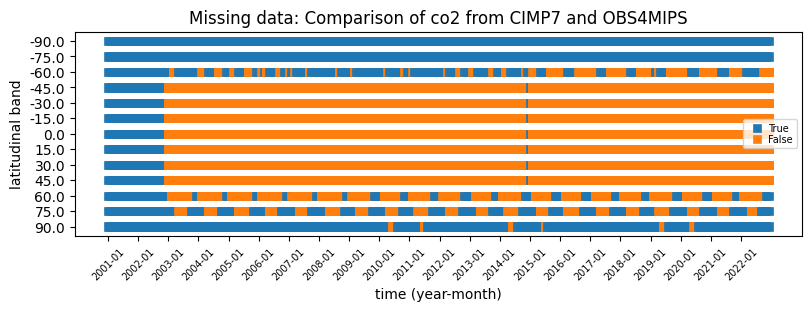

In [9]:
plot_missing(d_counts, "co2", figsize=(8,3))

In [10]:
# what's up with the blue line around 2015?
d_counts[(d_counts.lat_bnds == 15) & (d_counts.missings == "True")].year_month.unique()

<PeriodArray>
['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07',
 '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
 '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
 '2002-10', '2002-11', '2002-12', '2015-01']
Length: 25, dtype: period[M]